Aeroelasticity course MU4MES01 - S1

$\underline{\text{Student name}}$ : Valentin Duvivier

$\underline{\text{Under the direction of}}$ : Jean Camille Chassaing
    
$\underline{\text{Last modified}}$ : 11/10/2021

$\underline{Abstract}$ : This report is part of the TD : Supersonic_panel_flutter of the Aeroelastic course. It's conducted in order to study flutter conditions as well as modes distinction between mechanical and aero structures.

It has been done excluesively by Duvivier Valentin, and so I engage myself by confirming that no part of the following have been plagiarized in anyway.

### Presentation system

<img src="system.png"  width="1000" />

Figure 1: Real geometry (left) and simplified aeroelastic model where elastic panel is modelized by 3 rigid plates (right).

We will now go through a few steps that will eventually result into a better understanding of aeroelastic problems' specificities.

#### Libraries

In [1]:
from __future__ import division, print_function
import unittest
import numpy as np
import pylab as plt

import matplotlib.pyplot as plt2

#%matplotlib inline  
%matplotlib notebook

In [49]:
# mesh

l = 1

#### 1)

Under the assumption of either neglectable weight force or normalization of the generalized coordinates, one can write the potential energy P as :
    
$$P = \dfrac{1}{2}k_1 q_1^2 + \dfrac{1}{2}k_2 q_2^2 = \dfrac{1}{2}k q_1^2 + \dfrac{1}{2}k q_2^2$$ 

with $k_1=k_2=k$ the stifness of vertical springs and $q_1, q_2$ the generalized coordinates of the system.

#### 2) 
Given the following results, let's discuss the form of the equations describing the system :
    
$$K = \dfrac{1}{2}\left[\dfrac{2}{3} \dot{q}_1^2 + \dfrac{2}{3} \dot{q}_2^2 + \dfrac{1}{3} \dot{q}_1\dot{q}_2\right]$$

$$Q_1 = -\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}}q_2$$

$$Q_2 = +\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}}q_1$$

with $K$ the kinetic energy and ($Q_1$, $Q_2$) thhe generalized aerodynamic forces.

##### a)
the **generalized forces will participate to** the **coupling of structures's eigenmodes** given $Q_1$ terms presents a dependency on $q_2$ parameter while inversly $Q_2$ depends on $q_1$. These relations result from the fact the action of one spring will influence the other one. We have a coupling between the springs such that coupled modes may later appear.

##### b)
one can deduce from questions 1) and 2) the dynamic equations. To do so, one must apply Lagrange formula such that dynamic equations are given by :
    
$$\dfrac{d}{dt}\left( \dfrac{\partial L}{\partial \dot{q}}\right) - \dfrac{\partial L}{\partial q} + \dfrac{D}{\partial \dot{q}} = Q$$

with $L = K - P$ the lagrangian, D the viscous power (null here) and Q the generalized aero forces.

In order to furthermore work on the system, one will have to rewrite above system under a  matricial form. Doing so, we must introduce 3 matrices :

* $$M = \begin{pmatrix}
            \dfrac{2}{3}ml & \dfrac{1}{6}ml \\
            \dfrac{1}{6}ml & \dfrac{2}{3}ml
        \end{pmatrix}$$


* $$K = \begin{pmatrix}
            k & 0 \\
            0 & k
        \end{pmatrix}$$
        

* $$K_{aero} = \begin{pmatrix}
                   0 & -\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}} \\
                   \dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}} & 0
               \end{pmatrix}$$
        
such that
$$\left[ M\right]\ddot{q} + \left[ K\right]q = \left[ K_{aero}\right]q$$

accounts for the dynamic equations of the aeroelastical system.

Finally :

$$\left[ M\right]\ddot{q} + \left[ K - K_{aero}\right]q = 0$$

#### 3) 4)

Considering the structure is deformed under little harmonic deformations in time, one may look for solutions under the form $q = \bar{q}e^{i\omega t}$.

It comes $\ddot{q} = -\omega^2 q$ and so :

$$\left[ -M \omega^2 + (K - K_{aero})\right]q = \begin{bmatrix}
            -\dfrac{2}{3}ml\omega^2 + k & -\dfrac{1}{6}ml\omega^2 +\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}} \\
            -\dfrac{1}{6}ml\omega^2 -\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}} & -\dfrac{2}{3}ml\omega^2 + k
        \end{bmatrix}q$$

We rewrite by dividing by k the matricial system :

$$\begin{bmatrix}
            -\dfrac{2}{3}\dfrac{ml\omega^2}{k} + 1 & -\dfrac{1}{6}\dfrac{ml\omega^2}{k} +\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}k} \\
            -\dfrac{1}{6}\dfrac{ml\omega^2}{k} -\dfrac{1}{2}\rho_{\infty} \dfrac{U_{\infty}^2}{M_{\infty}k} & -\dfrac{2}{3}\dfrac{ml\omega^2}{k} + 1
        \end{bmatrix}q = \begin{bmatrix}
            -\dfrac{2}{3}\Omega^2 + 1 & -\dfrac{1}{6}\Omega^2 + \lambda \\
            -\dfrac{1}{6}\Omega^2 - \lambda & -\dfrac{2}{3}\Omega^2 + 1
        \end{bmatrix}q$$

with $\Omega^2 = \dfrac{\omega^2 ml}{k}$ and $\lambda = \dfrac{\rho_{\infty}U_{\infty}^2}{2M_{\infty}k}$

We deduce the matrix's determinant :

$$\Delta = \omega^4\left( M_{11}M_{22} - M_{12}M_{21}\right) + \omega^2\left( - M_{11}K_{22} - M_{22}K_{11} + M_{21}K_{12} + M_{12}K_{21}\right) + \left(K_{11}K_{22} - K_{12}K_{21}\right)$$

$$ = \omega^4\left( \dfrac{4}{9} - \dfrac{1}{36}\right) + \omega^2\left( - \dfrac{2}{3} - \dfrac{2}{3} + \dfrac{\lambda - \lambda}{6}\right) + \left(1 - (-\lambda)\lambda\right) = 0$$

$$= \dfrac{15}{36}\Omega^4 - \dfrac{4}{3}\Omega^2 + (1 + \lambda^2) = a\Omega^4 + b\Omega^2 + (c + \lambda^2) = 0$$

By association, we get : $a=\dfrac{15}{36}$, $b=-\dfrac{4}{3}$ and $c=1$.

#### 5)
We know the above equation must be null to ensure no trivial solutions. We then must find the roots of $\Omega^2$ such that this is true. Yet, the different roots will bring different aeroelastic behaviors. 

Then, depending on the roots' sign, we will either have stable movement (real part negative) or an unstable one (real part positive). Then the dependance of the aeroelastic behavior is made through the dependance on the roots of $det(\Delta) = b^2 - 4ac$.

Yet, we see $det(\Delta) = \dfrac{16}{9}\left(1 - \dfrac{15}{16}\left( 1+\lambda^2\right)\right) = \dfrac{1}{9}\left( 1 - 15\lambda^2\right)$, such that the roots directly depend on the factor $\lambda$. Let's then determine the factor $\lambda_F$ to then deduce $\Omega_F$ and characterize the flutter.

In [32]:
lambda_F = 1. / np.sqrt(15)
print(lambda_F)

0.2581988897471611


Another way to calculate the variable $\lambda = \lambda_F$ where flutter occurs is numerically :

In [33]:
# We define a function that returns the roots

def roots_flutter(lamb):
    
    """ Function returning the roots of Omega given the value of factor lambda """  
    
    # Compute the coefficients of the polynomial Delta = aw^4 + bw^2 + (c+lambda), resulting from setting the flutter determinant to zero

    A = +15/36;    B = -4/3;    C = +1 + lamb**2;
    
    # find the roots of the fourth order polynomial in w
    # Rq : we must set -B given we deal with omega and not p here
    sol     = np.roots([A, 0., B, 0., C]) #a*w^4 + 0*p^3 + b*w^2 + 0*p + c
    
    damping = np.imag(sol) # we inverse as we have i*(G + iO) = (-O + iG)
    freq    = np.real(sol) # same
        
    return damping, freq

##### Test code

In [34]:
# set dimensionless airspeed (between 0 and 3)
lamb = 1.2
eps  = 1.E-14 # value accounting for zero given possible numerical errors

# Solve the flutter determinant
damping, freq = roots_flutter(lamb)

if max(np.abs(damping)) > eps:
    print("\nWARNING: The aeroelastic system is UNSTABLE.")
else:
    print("\nWARNING: The aeroelastic system is STABLE.")
    
print("\nDamping modes :", damping)
print("Frequencies   :", freq)



Damping modes : [ 0.64028016 -0.64028016  0.64028016 -0.64028016]
Frequencies   : [-1.41773011 -1.41773011  1.41773011  1.41773011]


#### Find $\lambda_F$

In [35]:
# We automatize calculation to see what factor lambda_F is associated to flutter apparition

lamb_max = 10 # max coeff to test
lamb_min = 0  # min coeff to test

nb_iter  = 10**3
lamb     = np.linspace(lamb_min, lamb_max, num=nb_iter)

# ----------------------------------------------------- #
# Inizialize damping and factor matrices among which we will search for the flutter point.

dmpg = np.zeros((4, nb_iter), dtype=float) # 4 as we have 4 eigen-values --> we then will consider max (abs value) to define lambda_flutter
frq  = np.zeros((4, nb_iter), dtype=float) # same

# ----------------------------------------------------- #
# loop over lambda values

for idx, val in enumerate(lamb):

    # Solve the flutter determinant
    damping, freq = roots_flutter(val)
    
    dmpg[:,idx] = damping[:]
    frq [:,idx] = freq   [:]

# ----------------------------------------------------- #
# Find lambda_F

abs_dmpg = np.abs(dmpg)
idx      = np.where(abs_dmpg > eps) # i.e. where abs(Re(Omega)) > 0

lambda_flutter = lamb[idx[1][0]]

print('\nlambda_f = {:.3f}'.format(lambda_flutter))

print('\n-------------------------\n')

print('Damping   where flutter : ', dmpg[:,idx[1][0]])
print('Frequency where flutter : ', frq [:,idx[1][0]])


lambda_f = 0.260

-------------------------

Damping   where flutter :  [ 0.02001689 -0.02001689  0.02001689 -0.02001689]
Frequency where flutter :  [-1.26506944 -1.26506944  1.26506944  1.26506944]


The flutter can as well be visually determine, working with the curves of damping and frequency as functions of coeff $\lambda$ :

<IPython.core.display.Javascript object>


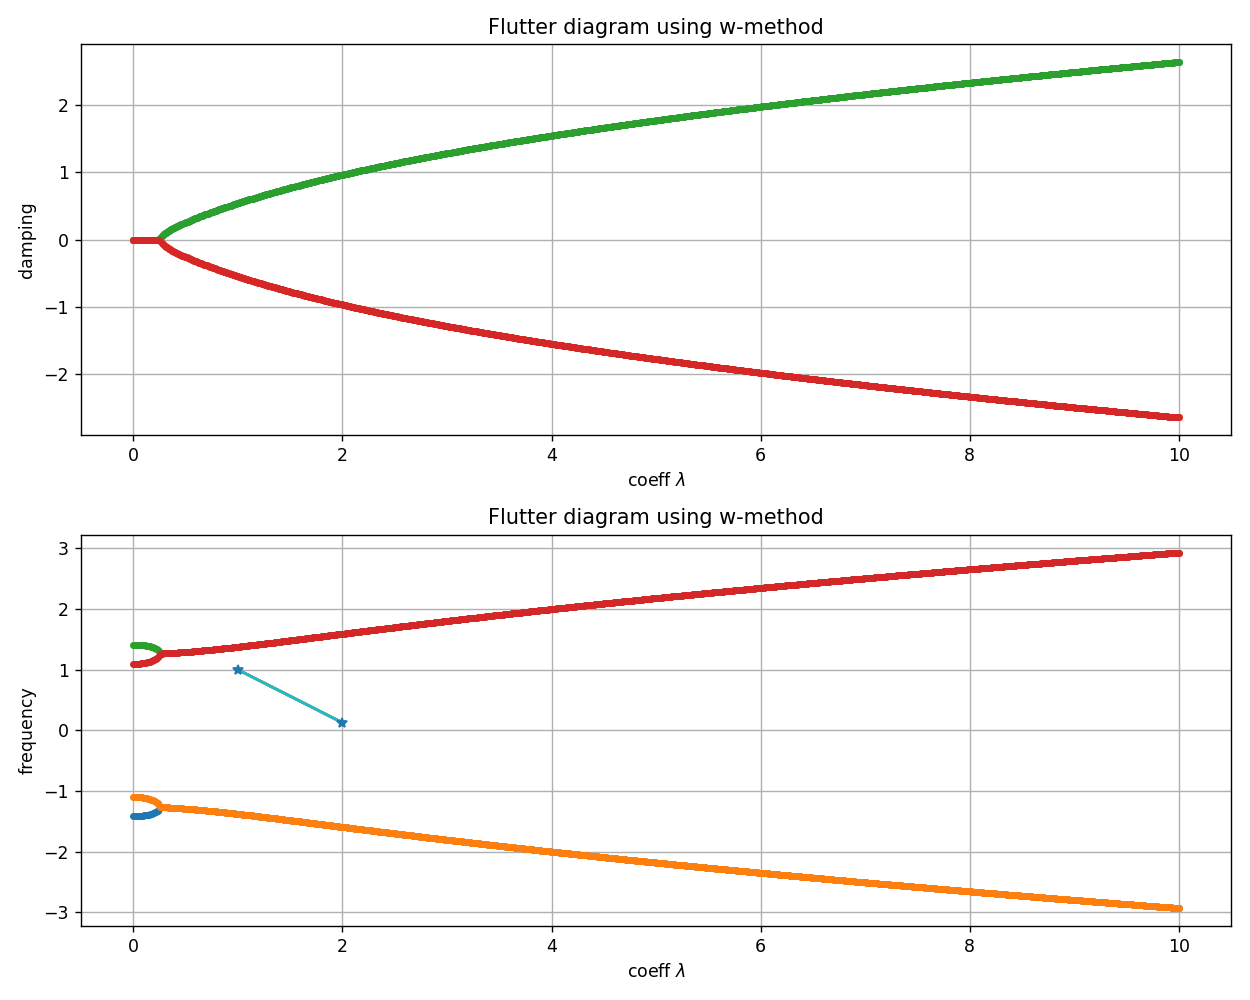

In [36]:
# Plot the damping and frequency in function of coeff lambda

fig1=plt.figure(figsize=(10,8))

plt.subplot(2, 1, 1)

plt.plot(lamb, dmpg[0,:], '.')
plt.plot(lamb, dmpg[1,:], '.')
plt.plot(lamb, dmpg[2,:], '.')
plt.plot(lamb, dmpg[3,:], '.')

plt.title('Flutter diagram using w-method')
plt.xlabel(r'coeff $\lambda$')
plt.ylabel(r'damping')

plt.grid(True)

# ------------------------------------------------ #
# ------------------------------------------------ #

plt.subplot(2, 1, 2)

plt.plot(lamb, frq[0,:], '.')
plt.plot(lamb, frq[1,:], '.')
plt.plot(lamb, frq[2,:], '.')
plt.plot(lamb, frq[3,:], '.')

plt.title('Flutter diagram using w-method')
plt.xlabel(r'coeff $\lambda$')
plt.ylabel('frequency')

plt.grid(True)
# plt.axis([0, 3.5, 0, 1.2])   

plt.tight_layout()


We can see from these graphs that to have neglected friction impies damping isn't null for a certain range of $\lambda$. Physically, it's not true and we rather have low values ($>1E^{-10}$).

Moreover, we find the 4 initial roots, that converge at the flutter points. Considering the symmetry of the graph (accounting for negative and positive modes), we get 2 modes.

Let's compare these to the one when $\lambda=0$ (i.e. when there is no aero influence).

#### 6)
##### a)

We enventually found the flutter coefficient $\lambda=\lambda_F$, lets work on the eigenvectors/eigenmodes.

##### $\Omega_{1,2}$

From calculation, one gets :

In [37]:
Omega_1       = roots_flutter(0)[1][-1]
Omega_2       = roots_flutter(0)[1][-2]

print('When no aero forces : {:.3f} rad & {:.3f} rad'.format(Omega_1, Omega_2))

When no aero forces : 1.095 rad & 1.414 rad


#### $\Omega_F$

In [99]:
a = 15/36;  b=-4/3;  c=1;  d = c+lambda_F**2
Delta    = np.complex(b**2 - 4 * a * d) == 0 # 0 as numerical error

Omega_F = np.sqrt(-b/(2*a))
print('When flutter : {:.3f} rad'.format(Omega_F))

# -----------
# Eigenmodes
# -----------

# get matrix of system

def matrix_system(Omega, lamb):
    
    """ Function returning the matrix of the system given parameters eigenvalues. """
    
    mat_syst = np.array([[-2/3 * Omega**2 + 1, -1/6 * Omega**2 + lamb],
                         [-1/6 * Omega**2 - lamb, -1/6 * Omega**2 + 1]])
    
    return mat_syst

# ------------------
# calculate ratio q1/q2 to get eigenmodes

#flutter
col1, col2 = matrix_system(Omega_F, lambda_F)[0,:], matrix_system(Omega_F, lambda_F)[1,:]

ratio_F1, ratio_F2 = -col1[1] / col1[0], -col2[1] / col2[0]
print('q2/q1 = {:.3f}'.format(ratio_F1))

# -----

#1
col1, col2 = matrix_system(Omega_1, 0)[0,:], matrix_system(Omega_1, 0)[1,:]

ratio_11, ratio_12 = -col1[1] / col1[0], -col2[1] / col2[0]
print('q2/q1 = {:.3f}'.format(ratio_11))

# -----

#2
col1, col2 = matrix_system(Omega_2, 0)[0,:], matrix_system(Omega_2, 0)[1,:]

ratio_21, ratio_22 = -col1[1] / col1[0], -col2[1] / col2[0]
print('q2/q1 = {:.3f}'.format(ratio_21))

When flutter : 1.265 rad
q2/q1 = -0.127
q2/q1 = 1.000
q2/q1 = -1.000


<ipython-input-99-d50fa9368c22>:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Delta    = np.complex(b**2 - 4 * a * d) == 0 # 0 as numerical error


<IPython.core.display.Javascript object>


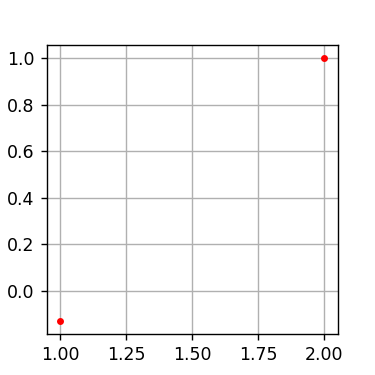

<IPython.core.display.Javascript object>


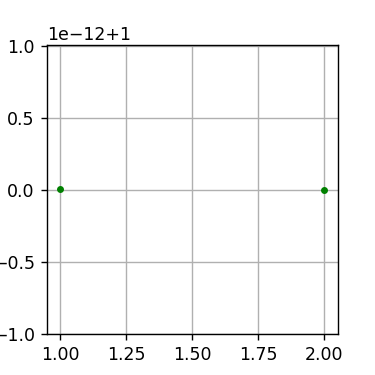

<IPython.core.display.Javascript object>


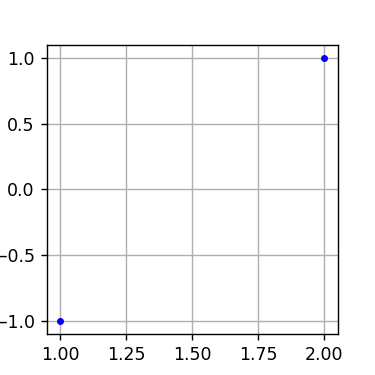

In [100]:
# Display modes

#flutter
q2 = 1; q1 = q2*ratio_F1

fig1=plt.figure(figsize=(3,3))
plt.plot(np.array([l, 2*l]), np.array([q1, q2]), 'r.', label='flutter')
plt.grid(True)

#1
q2 = 1; q1 = q2*ratio_11

fig1=plt.figure(figsize=(3,3))
plt.plot(np.array([l, 2*l]), np.array([q1, q2]), 'g.', label='flutter')
plt.grid(True)

#2
q2 = 1; q1 = q2*ratio_21

fig1=plt.figure(figsize=(3,3))
plt.plot(np.array([l, 2*l]), np.array([q1, q2]), 'b.', label='flutter')
plt.grid(True)

What is to understand is that the flutter mode isn't one of the mecanical modes : it results from the interaction of the structure with the flow ; which results into another mode.

We observe 3 modes : 2 from mechanic (static modes/structural modes) and a flutter mode. We as well see that while modes 1 and 2 are modes of rotation and translation, the flutter one looks as a mix of them.

#### 7)
p method : by replacing $e^{i\omega t}$ by $e^{pt}$ from $p=i\omega$, we go from a Fourier transform to a Laplace transform. Then, one only needs to change -B for B in code *roots_flutter* to have an equivalent method.

Besides, the matricial system will have to change, forcig b=-b then. Note that p method is used to work on various force shape (not only i$\omega$).

**THE END**